In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### (1) 데이터 가져오기

---

- `sklearn.datasets`의 `load_diabetes`에서 데이터를 가져와주세요.
- `diabetes`의 `data`를 `df_X`에, `target`을 `df_y`에 저장해주세요.

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dataset = load_diabetes()
df_X, df_y = dataset.data, dataset.target
print(df_X.shape, df_y.shape, sep='\n')

(442, 10)
(442,)


### (2) 모델에 입력할 데이터 `X` 준비하기

---

- `df_X`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [4]:
df_X = np.array(df_X)  #? 이미 numpy array이지 않나?
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

### (3) 모델에 예측할 데이터 `y` 준비하기

---

- `df_y`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [5]:
df_y = np.array(df_y)
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### (4) train 데이터와 test 데이터로 분리하기

---

- `X`와 `y` 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

### (5) 모델 준비하기

---

- 입력 데이터 개수에 맞는 가중치 `W`와 `b`를 준비해주세요.
- 모델 함수를 구현해주세요.

In [7]:
W = np.random.rand(10)
b = np.random.rand()

In [8]:
def model(X, W, b):
    pred = 0
    for i in range(10):
        # X의 모든 샘플에 대해 i번째 특성(column)과 W의 i번째 가중치를 곱한 값을 변수에 더한다.
        pred += X[:, i] * W[i]
    pred += b
    return pred

### (6) 손실함수 `loss` 정의하기

---

- 손실함수를 MSE 함수로 정의해주세요.

In [9]:
def loss_mse(X, W, b, y):
    pred = model(X, W, b)
    truth = y  # shadowing
    loss = ((pred - truth) ** 2).mean()  # Mean Square Error
    return loss

### (7) 기울기를 구하는 `gradient` 함수 구현하기

---

- 기울기를 계산하는 `gradient` 함수를 구현해주세요.

In [10]:
def gradient(X, W, b, y):
    # 데이터 포인트 개수
    N = len(y)
    
    # 예측값
    y_pred = model(X, W, b)
    
    # gradient 계산
    d_W = 1/N * 2 * X.T.dot(y_pred - y)
    d_b = 2 * (y_pred - y).mean()
    return d_W, d_b

d_W, d_b = gradient(X_train, W, b, y_train)  # 훈련 데이터셋으로 진행
print("d_W:", d_W)
print("d_b:", d_b)

dW: [-1.8558086  -0.10548709 -4.97731505 -3.71175686 -1.30579502 -0.89412011
  3.11397901 -3.27145052 -4.47799205 -3.51369068]
db: -307.1423406527752


### (8) 하이퍼 파라미터인 학습률 설정하기

---

- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [11]:
LEARNING_RATE = 0.05

### (9) 모델 학습하기

---

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.

In [12]:
losses = []

def custom_fit(iter, X, W, b, y):
    for i in range(1, iter):
        d_W, d_b = gradient(X, W, b, y)
        W -= LEARNING_RATE * d_W
        b -= LEARNING_RATE * d_b
        L = loss_mse(X, W, b, y)
        losses.append(L)
        
        if i % 10000 == 0:
            print(f"반복 순회 no.{i} : 손실 {L}")
            
    
custom_fit(100000, X_train, W, b, y_train)

반복 순회 no.10000 : 손실 2914.7064760972958
반복 순회 no.20000 : 손실 2898.0081625194293
반복 순회 no.30000 : 손실 2896.220714672719
반복 순회 no.40000 : 손실 2895.0436274417793
반복 순회 no.50000 : 손실 2893.951215250974
반복 순회 no.60000 : 손실 2892.907357269109
반복 순회 no.70000 : 손실 2891.907291439883
반복 순회 no.80000 : 손실 2890.948787881102
반복 순회 no.90000 : 손실 2890.029960563266


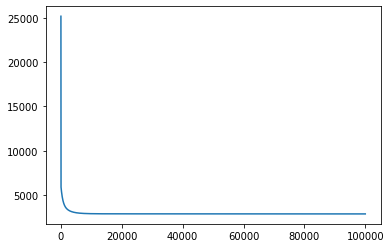

In [13]:
plt.plot(losses)
plt.show()

In [14]:
print(W, b, sep='\n\n')

[  41.7980332  -240.41014613  556.03035733  343.29987455 -226.5961229
  -33.63015419 -154.31122689  175.53404328  466.80422579   53.71411691]

0.162926425505589


### (10) test 데이터에 대한 성능 확인하기

---

- test 데이터에 대한 성능을 확인해주세요.

In [15]:
prediction = model(X_test, W, b)
mse = loss_mse(X_test, W, b, y_test)
mse

26968.034544005546

### (11) 정답 데이터와 예측한 데이터 시각화하기

---

- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

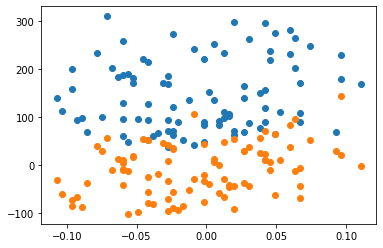

In [18]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()